In [0]:
def visulize_mnist(data, label):
  # Make those columns into a array of 8-bits pixels
  # This array will be of 1D with length 784
  # The pixel intensity values are integers from 0 to 255
  pixels = np.array(data, dtype='uint8')

  # Reshape the array into 28 x 28 array (2-dimensional array)
  pixels = pixels.reshape((8, 8))

  # Plot
  plt.title('Label is {label}'.format(label=label))
  plt.imshow(pixels, cmap='gray')
  plt.show()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [0]:
mnist = load_digits()

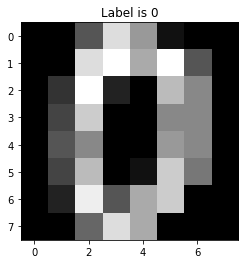

In [0]:
visulize_mnist(mnist.data[0], mnist.target[0])

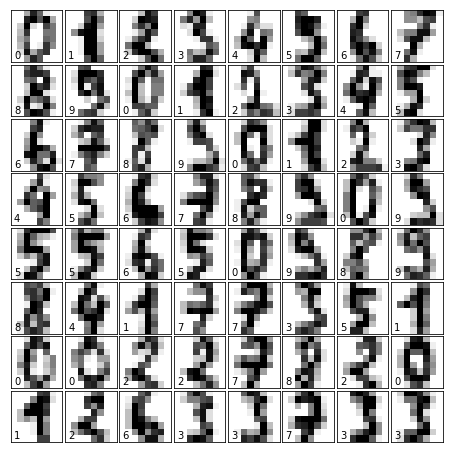

In [0]:
digits = load_digits()
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
  ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
  ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
  # label the image with the target value
  ax.text(0, 7, str(digits.target[i]))

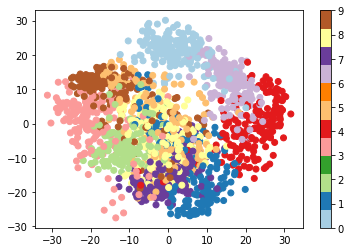

In [0]:
plt.figure()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

In [0]:
pca = PCA(n_components=36, whiten=True)
X_pca = pca.fit_transform(digits.data / 255)

In [0]:
len(pca.explained_variance_ratio_)

36

<BarContainer object of 36 artists>

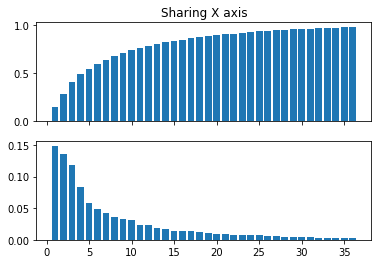

In [0]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].bar(np.arange(1, 37), np.cumsum(pca.explained_variance_ratio_))
axarr[0].set_title('Sharing X axis')
axarr[1].bar(np.arange(1, 37), pca.explained_variance_ratio_)

In [0]:
X_rebuilt = pca.inverse_transform(X_pca)

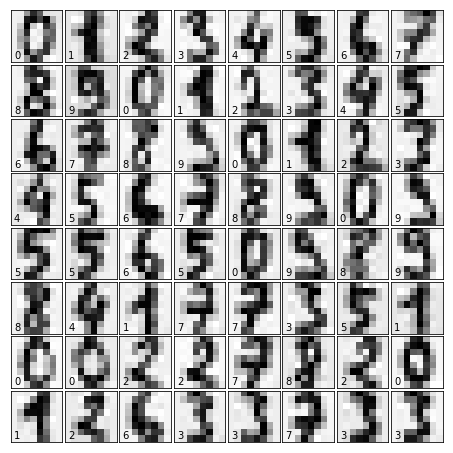

In [0]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
  ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
  ax.imshow(X_rebuilt[i].reshape((8, 8)), cmap=plt.cm.binary, interpolation='nearest')
  # label the image with the target value
  ax.text(0, 7, str(digits.target[i]))

In [0]:
digits.images[0].shape

(8, 8)

Text(0.5, 1.0, 'Image After PCA')

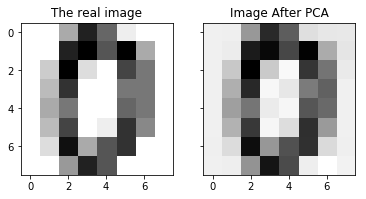

In [0]:
f, axarr = plt.subplots(ncols=2, sharey=True,)
axarr[0].imshow(digits.images[0], cmap=plt.cm.binary, interpolation='nearest')
axarr[0].set_title('The real image')
axarr[1].imshow(X_rebuilt[0].reshape((8, 8)), cmap=plt.cm.binary, interpolation='nearest')
axarr[1].set_title('Image After PCA')

In [0]:
from sklearn.datasets import make_circles
Xb, Yb = make_circles(n_samples=500, factor=0.1, noise=0.05)

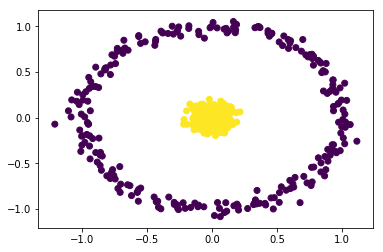

In [0]:
plt.scatter(Xb[:, 0], Xb[:, 1], c=Yb)

In [0]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf',
                 fit_inverse_transform=True, gamma=1.0)
X_kpca = kpca.fit_transform(Xb)

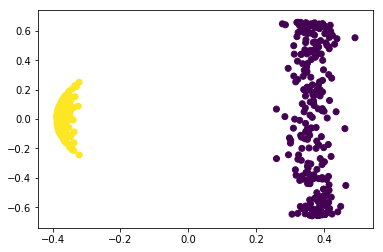

In [0]:
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=Yb)

In [0]:
from sklearn.decomposition import DictionaryLearning
dl = DictionaryLearning(n_components=36,
                        fit_algorithm='lars', 
                        transform_algorithm='lasso_lars',
                        max_iter=1000, n_jobs=-1)
X_dict = dl.fit_transform(digits.data)

In [0]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
  ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
  ax.imshow(X_dict[i].reshape((8, 8)), cmap=plt.cm.binary, interpolation='nearest')
  # label the image with the target value
  ax.text(0, 7, str(digits.target[i]))

In [0]:
f, axarr = plt.subplots(ncols=2, sharey=True,)
axarr[0].imshow(digits.images[0], cmap=plt.cm.binary, interpolation='nearest')
axarr[0].set_title('The real image')
axarr[1].imshow(X_dict[0].reshape((8, 8)), cmap=plt.cm.binary, interpolation='nearest')
axarr[1].set_title('Image After PCA')